This is my capstone project for the Udacity Machine Learning Nanodegree.

Import the libraries needed.

In [1]:
import pandas as pd
import numpy as np
import keras as kr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os import listdir

Using TensorFlow backend.


Get the data.

In [2]:
directory = 'sandp500/individual_stocks_5yr'
#directory = '/OneDrive/Documents/Projects/MachineLearning/Udacity/Capstone/sandp500/individual_stocks_5yr'
dir_listing = listdir(directory)

In [3]:
symbols_list = []

for symbol in dir_listing:
    symb = symbol.split('_')[0]
    symbols_list.append(symb)

print(len(symbols_list))
print(symbols_list[0])

504
AAL


In [4]:
csv_file = '{}/{}_data.csv'.format(directory, symbols_list[0])

Since we already know the name of the specific stock we are trying to get from the name of the file, we can drop that column in the dataframe.

In [5]:
dataset = pd.read_csv(csv_file)

In [6]:
dataset = dataset.assign(trading_date = pd.to_datetime(dataset['Date']))

In [7]:
# below code is copied from: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [8]:
dataset

,Date,Open,High,Low,Close,Volume,Name,trading_date
0,2013-12-09,23.85,25.44,23.45,24.60,43197268,AAL,2013-12-09
1,2013-12-10,24.50,25.17,24.41,24.88,18660625,AAL,2013-12-10
2,2013-12-11,25.48,27.20,25.37,25.99,38843371,AAL,2013-12-11
3,2013-12-12,26.20,26.71,25.45,25.45,19981824,AAL,2013-12-12
4,2013-12-13,25.75,26.30,25.52,26.23,12192421,AAL,2013-12-13
5,2013-12-16,26.63,26.77,26.35,26.61,13190945,AAL,2013-12-16
6,2013-12-17,26.48,26.59,25.95,26.10,11413199,AAL,2013-12-17
7,2013-12-18,25.99,26.23,25.55,26.23,9994162,AAL,2013-12-18
8,2013-12-19,26.12,26.49,25.82,26.12,6916497,AAL,2013-12-19
9,2013-12-20,26.18,26.49,26.14,26.33,8530924,AAL,2013-12-20


In [1]:
# load dataset
#read_csv('pollution.csv', header=0, index_col=0)
dataset = dataset.drop('Name', 1)
dataset = dataset.drop('Date', 1)
dataset.set_index(['trading_date'], inplace=True)
values = dataset.values

NameError: name 'dataset' is not defined

In [10]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5, 6, 7, 9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var4(t)
1   0.000000   0.008701   0.000000   0.000000   0.997838  0.008986
2   0.020287   0.000000   0.030563   0.008986   0.934054  0.044608
3   0.050874   0.065421   0.061127   0.044608   0.992432  0.027279
4   0.073346   0.049629   0.063674   0.027279   0.948108  0.052311
5   0.059301   0.036416   0.065903   0.052311   0.753514  0.064506


In [11]:
values = reframed.values
train_len = int(len(values) * 0.80)
test_len = len(values) - train_len

In [14]:
print(train_len)
print(test_len)

740
185


In [12]:
train = values[0:train_len]
test = values[train_len:]

In [16]:
print("Train")
print(train)
print("Test")
print(test)

Train
[[ 0.          0.00870132  0.          0.          0.99783784  0.00898588]
 [ 0.0202871   0.          0.03056347  0.00898588  0.93405408  0.04460847]
 [ 0.05087388  0.06542063  0.06112701  0.04460847  0.99243248  0.0272786 ]
 ..., 
 [ 0.58863914  0.5871737   0.59535176  0.56803596  0.47027028  0.58825421]
 [ 0.56866407  0.57299387  0.58038837  0.58825421  0.24108109  0.60333776]
 [ 0.59800243  0.59426367  0.6217764   0.60333776  0.37513515  0.64698339]]
Test
[[ 0.66011226  0.64808249  0.64119703  0.64698339  0.80216217  0.63703477]
 [ 0.64950061  0.63261354  0.65202159  0.63703477  0.19351351  0.68132234]
 [ 0.64107358  0.66645181  0.65584201  0.68132234  0.45297298  0.695122  ]
 ..., 
 [ 0.83739066  0.82533026  0.84176999  0.81514776  0.04108108  0.79589236]
 [ 0.80805242  0.79761517  0.82075769  0.79589236  0.08972973  0.7686137 ]
 [ 0.78589249  0.77892363  0.78764719  0.7686137   0.12        0.76219511]]


In [22]:
X_train = train[:, :-1]
y_train = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

# reshape
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(740, 1, 5) (740,) (185, 1, 5) (185,)


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from sklearn.metrics import mean_squared_error

In [25]:
rnn_model = Sequential()
rnn_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(loss='mae', optimizer='adam')

In [27]:
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 740 samples, validate on 185 samples
Epoch 1/50
0s - loss: 0.0518 - val_loss: 0.0630
Epoch 2/50
0s - loss: 0.0478 - val_loss: 0.0566
Epoch 3/50
0s - loss: 0.0440 - val_loss: 0.0488
Epoch 4/50
0s - loss: 0.0405 - val_loss: 0.0424
Epoch 5/50
0s - loss: 0.0374 - val_loss: 0.0362
Epoch 6/50
0s - loss: 0.0347 - val_loss: 0.0304
Epoch 7/50
0s - loss: 0.0324 - val_loss: 0.0264
Epoch 8/50
0s - loss: 0.0306 - val_loss: 0.0247
Epoch 9/50
0s - loss: 0.0291 - val_loss: 0.0234
Epoch 10/50
0s - loss: 0.0281 - val_loss: 0.0231
Epoch 11/50
0s - loss: 0.0275 - val_loss: 0.0225
Epoch 12/50
0s - loss: 0.0270 - val_loss: 0.0223
Epoch 13/50
0s - loss: 0.0266 - val_loss: 0.0224
Epoch 14/50
0s - loss: 0.0264 - val_loss: 0.0224
Epoch 15/50
0s - loss: 0.0263 - val_loss: 0.0224
Epoch 16/50
0s - loss: 0.0261 - val_loss: 0.0224
Epoch 17/50
0s - loss: 0.0260 - val_loss: 0.0227
Epoch 18/50
0s - loss: 0.0260 - val_loss: 0.0225
Epoch 19/50
0s - loss: 0.0259 - val_loss: 0.0227
Epoch 20/50
0s - loss: 0.0259 - 

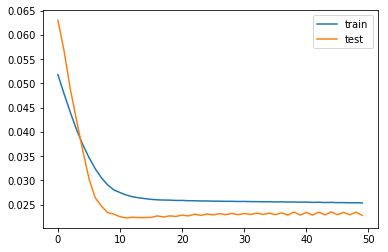

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [32]:
yhat = rnn_model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [34]:
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:,1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

In [ ]:
rmse = sqrt(mean)

In [ ]:
 l;asjfsdlk f

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

This code is for comparing the different columns of the raw data. 

In [ ]:
df[['Open', 'High', 'Low', 'Close']].plot()
plt.show()
df['Volume'].plot()
plt.show()

The following is graphing a few of the graphs with the opening price and the volume on one graph to compare with two different axis'.  I thought to do this as a comparison between the opening price (which all the raw data features follow roughly the same line) and the volume feature.  Since the volume feature is important. [http://www.investopedia.com/terms/v/volume.asp]

In [ ]:
def getting_preprocessed_data(symbol):
        csv_file = '{}/{}_data.csv'.format(directory, symbol)
        df = pd.read_csv(csv_file)
        df = df.drop('Name', 1)
        df.set_index('Date', inplace=True)
        # below was found at https://stackoverflow.com/questions/29314033/python-pandas-dataframe-remove-empty-cells
        df['Open'].replace('', np.nan, inplace=True)
        df.dropna(subset=['Open'], inplace=True)
        return df

def plotting_stocks(symbols_list, amount_of_stocks=0):
    if amount_of_stocks == 0:
        amount_of_stocks = len(symbols_list)
        
    for symbol in symbols_list[:amount_of_stocks]:
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.7)
        df = getting_preprocessed_data(symbol)
        print(symbol)
        df.Open.plot(ax=ax, style='b-', figsize=(20,10))
        # same ax as above since it's automatically added on the right
        df.Volume.plot(ax=ax, style='r-', secondary_y=True, figsize=(20,10))
        # add legend --> take advantage of pandas providing us access
        # to the line associated with the right part of the axis
        #ax.legend([ax.get_lines()[0], ax.get_lines()[0]], ['Open','Volume'], bbox_to_anchor=(1.5, 0.5))
        plt.show()
        #below is the Daily Returns calculation to put into the Sharpe Ratio. 
        df_preprocessed = df.assign(Daily_Returns = np.divide((df.Open - df.Close), df.Close) * 100)

        #Below is the calculation for the Sharpe Ratio column. 
        df_preprocessed = df_preprocessed.assign(Sharpe_Ratio = np.divide((df_preprocessed.Daily_Returns - 0.046), np.std(np.array([df_preprocessed.Open, df_preprocessed.High, df_preprocessed.Low, df_preprocessed.Close]))))

        #Below is the rate of change (momentum) for the specific stock. 
        df_preprocessed = df_preprocessed.assign(Rate_of_Change = (np.divide(df_preprocessed.Close, df_preprocessed.Open) - 1) * 100)

        #df.plot.scatter(x='Open', y='Volume', label="AAL")
        log_df = np.log(df)
        log_df.plot.scatter(x='Volume', y='Open', label="AAL", figsize=(20,10))
        plt.show()
        df_preprocessed.plot.scatter(x='Open', y='Sharpe_Ratio', label="Sharpe Ratio Open", figsize=(20,10))
        plt.show()
        df_preprocessed.plot.scatter(x='Volume',y='Sharpe_Ratio', label="Sharpe Ratio Close", figsize=(20,10), use_index=True)
        plt.show()

In [ ]:
# printing out the first four stocks to get an idea of how each stock is individually represented.
plotting_stocks(symbols_list, 10)

#df.plot.scatter(x='Open', y='Volume', label="AAL")
log_df = np.log(df)
log_df.plot.scatter(x='Volume', y='Open', label="AAL", figsize=(20,10))
plt.show()

log_df.plot.scatter(x='Volume', y='Close', label="AAL", figsize=(20,10))
plt.show()

log_df.plot(x=log_df.index, y='Open', label="AAL", figsize=(20,10), use_index=True, style='.')
plt.show()

In [ ]:
#below is the Daily Returns calculation to put into the Sharpe Ratio. 
df_preprocessed = df.assign(Daily_Returns = np.divide((df.Open - df.Close), df.Close) * 100)

In [ ]:
#Below is the calculation for the Sharpe Ratio column. 
df_preprocessed = df_preprocessed.assign(Sharpe_Ratio = np.divide((df_preprocessed.Daily_Returns - 0.046), np.std(np.array([df_preprocessed.Open, df_preprocessed.High, df_preprocessed.Low, df_preprocessed.Close]), ddof=1)))

In [ ]:
#Below is the rate of change for the specific stock. 
df_preprocessed = df_preprocessed.assign(Rate_of_Change = (np.divide(df_preprocessed.Close, df_preprocessed.Open) - 1) * 100)

In [ ]:
df_preprocessed.plot.scatter(x='Volume', y='Sharpe_Ratio', label="AAL", figsize=(20,10))
plt.show()

In [ ]:
from IPython.display import display
display(df_preprocessed.head(n=1))

In [ ]:
# I am using some of the techniques I learned from previous projects.  The below is from the Finding Donors Project.
closing = df_preprocessed['Close'].astype(int)
features = df_preprocessed.drop('Close', axis = 1)

#closing_raw
#features_raw

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, closing, test_size=0.2, random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
clf = SVC(random_state=2)

learner = clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100

print("Accuracy is: {:.4f}%".format(accuracy))

# This next section will be the creation of the RNN-LSTM model. 

Some information gathered from https://machinelearningmastery.com

From my research and many hours of trial and error I have discovered that the preprocessing needs to be different for the RNN-LSTM as compared to the SVC.  https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
features_rnn = np.array(features)
closing_rnn = np.array(closing)

features_train_len = int(len(features_rnn) * 0.80)
features_test_len = int(len(features_rnn) - features_train_len)

X_train = features_rnn[0:features_train_len]
X_test = features_rnn[features_test_len:len(features_rnn)]

y_train = closing_rnn[0:features_train_len]
y_test = closing_rnn[features_test_len:len(closing_rnn)]

In [ ]:
X_train = X_train.reshape(1, features_train_len, 7)
y_train = y_train.reshape(1, features_train_len, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
rnn_model = Sequential()
rnn_model.add(LSTM(32, input_shape=(740, 7)))
rnn_model.add(Dense(1))

In [ ]:
rnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn_model.fit(X_train, y_train, epochs=100)